In [3]:
from apps.twodimensional.shallowwatermomentequations import shallow_water_moment_equations as swme
from apps.twodimensional.shallowwaterlinearizedmomentequations import shallow_water_linearized_moment_equations as swlme
from apps.twodimensional.shallowwaterlinearizedmomentequations.smoothexample import smooth_example as swlme_se
from pydogpack import main
from pydogpack.tests.utils import utils
from pydogpack.timestepping import explicit_runge_kutta
from pydogpack.utils import dg_utils
from pydogpack.utils import math_utils
from pydogpack.utils import x_functions
from pydogpack.utils import xt_functions
from pydogpack.visualize import plot
from pydogpack.mesh import mesh
from pydogpack.basis import basis

import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

from IPython.display import HTML

# Smooth Example

In [ ]:
num_moments = 0
gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

problem = swlme_se.SmoothExample( 
    max_wavespeed, 
    num_moments, 
    gravity_constant, 
    kinematic_viscosity, 
    slip_length
)

time_final = 0.03
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 1
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = False
problem.parameters["time_stepping"]["num_frames"] = 10
problem.parameters["time_stepping"]["order"] = space_time_order

problem.parameters["mesh"]["mesh_class"] = "mesh_2d_cartesian"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["y_bottom"] = y_bottom
problem.parameters["mesh"]["y_top"] = y_top
problem.parameters["mesh"]["num_rows"] = num_rows
problem.parameters["mesh"]["num_cols"] = num_cols

problem.parameters["basis"]["basis_class"] = "legendre_2d_cartesian"
problem.parameters["basis"]["inner_product_constant"] = 0.25
problem.parameters["basis"]["space_order"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "periodic"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl = 0.1
delta_x = (x_right - x_left) / num_cols
delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, delta_x))
problem.parameters["delta_t"] = delta_t

problem._setup_objects()

In [14]:
ic = swlme_se.InitialCondition(0)
mesh_ = mesh.Mesh2DMeshGenDogPack("mesh_output_2")
basis_ = basis.ModalBasis2DTriangle(1)

In [15]:
dg_solution = basis_.project(ic, mesh_)

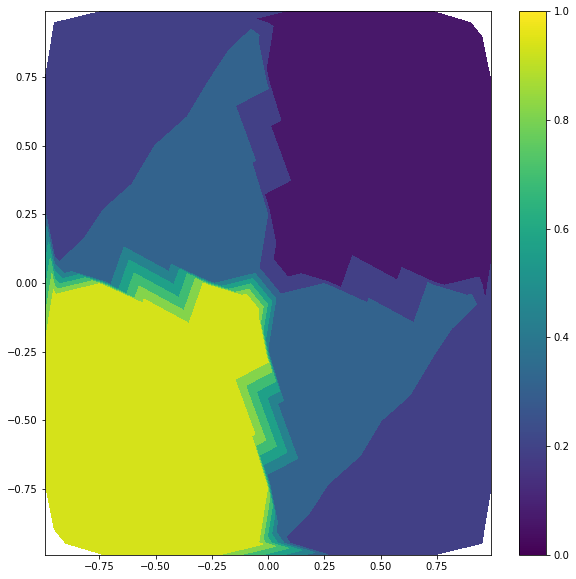

In [16]:
dg_solution.create_plot(0);

In [17]:
dg_solution.coeffs

array([[[1.14959741],
        [0.40644406],
        [0.40644406]],

       [[1.14959741],
        [0.40644406],
        [0.40644406]],

       [[1.0432338 ],
        [0.36883885],
        [0.36883885]],

       [[1.03710917],
        [0.36667346],
        [0.36667346]],

       [[1.01078906],
        [0.3573679 ],
        [0.3573679 ]],

       [[1.01078906],
        [0.3573679 ],
        [0.3573679 ]],

       [[1.03710917],
        [0.36667346],
        [0.36667346]],

       [[1.0432338 ],
        [0.36883885],
        [0.36883885]]])

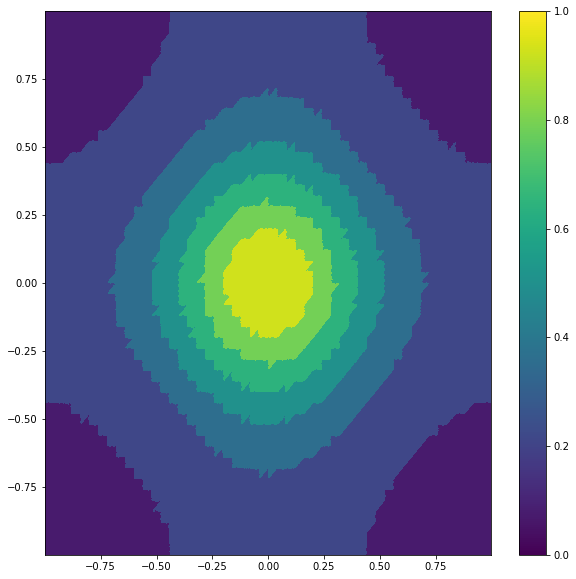

In [21]:
mesh_ = mesh.Mesh2DTriangulatedRectangle(-1.0, 1.0, -1.0, 1.0, 50, 50)
dg_solution = basis_.project(ic, mesh_)
dg_solution.create_plot(1);

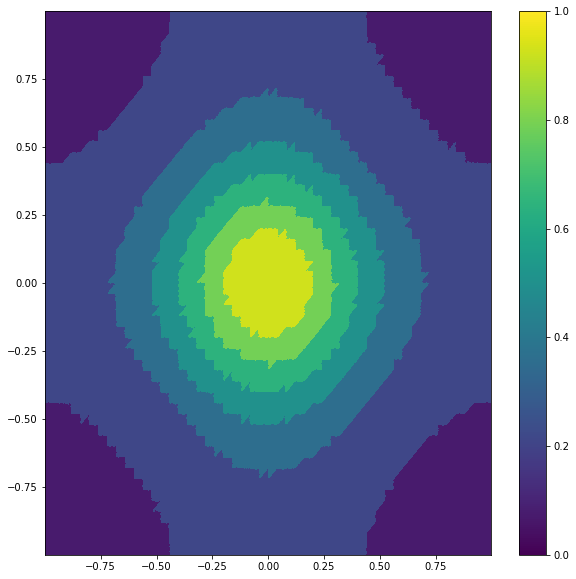

In [22]:
dg_solution.create_plot(2);